<a href="https://colab.research.google.com/github/LXHayato/Boston/blob/main/BostonRealEstate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Google Driveに接続
from google.colab import drive
drive.mount('/content/drive')
MyFolder='/content/drive/My Drive/Colab Notebooks/Reference_sample/'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
MyFilename="LinerData.csv"

df=pd.read_csv(MyFolder + MyFilename)
df

,x,y
0,24.9,56.9
1,0.3,29.7
2,62.9,137.3
3,51.0,131.7
4,7.7,42.5
...,...,...
95,3.9,37.1
96,33.7,89.3
97,98.9,199.7
98,80.2,175.3


In [ ]:
# ボストンデータセットをcsvで表示しただけ
from sklearn import datasets
boston=datasets.load_boston()

X_boston_df=pd.DataFrame(boston.data, columns=boston.feature_names)
Y_boston_df=pd.Series(boston.target, name='PRICE')
boston_df=pd.concat([X_boston_df, Y_boston_df], axis=1)

boston_df.to_csv(MyFolder + 'boston.csv', index=False)

In [ ]:
MyFilename='boston.csv'

df=pd.read_csv(MyFolder + MyFilename)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# モデル作成/精度検証
from sklearn.ensemble import RandomForestRegressor

X=df.iloc[:, 0:len(df.columns) - 1 ]
Y=df.iloc[:,len(df.columns) - 1]

X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=10000)

model=RandomForestRegressor(random_state=10000)
model.fit(X_train, Y_train)

Y_train_pred=model.predict(X_train)
Y_test_pred=model.predict(X_test)

r2_train=r2_score(Y_train, Y_train_pred)
print('r2_train = ', r2_train)
r2_test=r2_score(Y_test, Y_test_pred)
print('r2_test = ', r2_test)


r2_train =  0.9776339009359513
r2_test =  0.8900747373550184


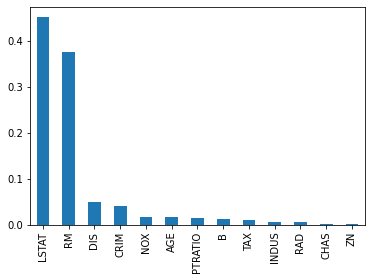

In [ ]:
# 説明変数の重要度表示
importance = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

importance.plot.bar()
plt.show()

In [ ]:
# モデルを保存
import pickle
MyModelname='RF_model.pkl'
pickle.dump(model,open(MyFolder + MyModelname, 'wb'))

In [1]:
!git remote add origin https://github.com/LXHayato/BostonRealEstate.git

fatal: not a git repository (or any of the parent directories): .git
